# 04 Классификация в sklearn + метрики классификации. Пшенин Владислав Игоревич 6133

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pylab as plt
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
# Read the data and create DataFrame from it
data = pd.read_csv('winequality-red.csv')

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
# Red Wine Quality
## Columns
1 - fixed acidity <br>
2 - volatile acidity <br>
3 - citric acid <br>
4 - residual sugar <br>
5 - chlorides <br>
6 - free sulfur dioxide <br>
7 - total sulfur dioxide <br>
8 - density <br>
9 - pH <br>
10 - sulphates <br>
11 - alcohol <br>

Output variable (based on sensory data):
12 - quality (score between 0 and 10)

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 1. Многоклассовая классификация.
### На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy.

In [4]:
# Исходный набор данных
y = data['quality']
x = data.drop(['quality'], axis=1)

# Норм набор данных
xNorm = x.copy()
    
scaler = MinMaxScaler().fit(xNorm.values)
xNorm = scaler.transform(xNorm.values)
xNorm = pd.DataFrame(xNorm, columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'])
xNorm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


### Разделение на тестовую и тренировочную выборки

In [5]:
# Исходный набор данных
X_train, X_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.25, random_state=42)
# Норм набор данных
X_trainN, X_testN, y_trainN, y_testN = train_test_split(xNorm.values, y.values, test_size=0.25, random_state=42)

### Обучение моделей

In [6]:
# Исходный набор данных
model = KNeighborsClassifier(n_neighbors=3)
model = model.fit(X_train, y_train)
model.score(X_test, y_test)

0.44

In [7]:
# Норм набор данных
model_norm = KNeighborsClassifier(n_neighbors=3)
model_norm = model_norm.fit(X_trainN, y_trainN)
model_norm.score(X_testN, y_testN)

0.545

### Кросс-валидация

In [8]:
# Исходный набор данных
cv_results = cross_validate(model, X_train, y_train, cv=3)
cv_results

{'fit_time': array([0.00199938, 0.0019989 , 0.00200081]),
 'score_time': array([0.01399565, 0.01299453, 0.01199484]),
 'test_score': array([0.4825    , 0.45      , 0.48621554])}

In [9]:
# Норм набор данных
cv_resultsN = cross_validate(model_norm, X_trainN, y_trainN, cv=3)
cv_resultsN

{'fit_time': array([0.00199938, 0.00199819, 0.00199938]),
 'score_time': array([0.01999211, 0.01699448, 0.01799536]),
 'test_score': array([0.5475    , 0.5325    , 0.52130326])}

### Обучить модель при различных значениях гиперпараметра k_neighbours и построить график accuracy для train set и test_set для разных значений гиперпараметра

In [10]:
def plot_results(X_train, y_train, X_test, y_test):
    training_accuracy = []
    test_accuracy = []
    neighbors_settings = range(1, 11)
    for n_neighb in neighbors_settings:
        model_n = KNeighborsClassifier(n_neighbors = n_neighb)
        model_n.fit(X_train, y_train)
        training_accuracy.append(model_n.score(X_train, y_train))
        test_accuracy.append(model_n.score(X_test, y_test))

    plt.plot(neighbors_settings, training_accuracy, label="Точность на train")
    plt.plot(neighbors_settings, test_accuracy, label="Точность на test")
    plt.ylabel("Точность")
    plt.xlabel("Количество соседей")
    plt.legend()

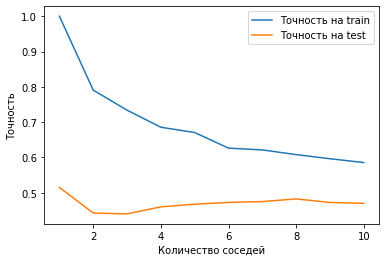

In [11]:
# Исходный набор данных
plot_results(X_train, y_train, X_test, y_test)

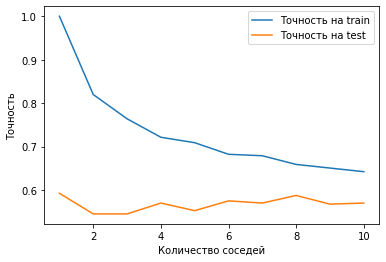

In [12]:
# Норм набор данных
plot_results(X_trainN, y_trainN, X_testN, y_testN)

### Построить confusion matrix

In [13]:
def confusion_matr(X_train,X_test, y_train, y_test):    
    y = dict(Counter(y_test))
    y = dict(sorted(y.items())).values()
    model = KNeighborsClassifier(n_neighbors=8)
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confusion_scores = confusion_matrix(y_test, y_pred)
    confusion_df = pd.DataFrame(confusion_scores, columns = y, index = y)
    sns.heatmap(confusion_df, annot = True)

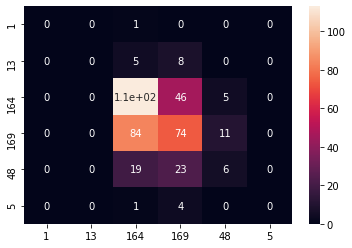

In [14]:
# Исходный набор данных
confusion_matr(X_train,X_test, y_train, y_test)

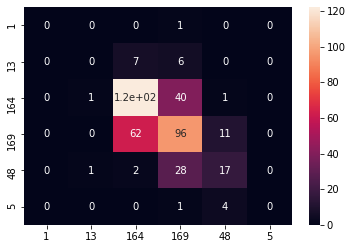

In [15]:
# Норм набор данных
confusion_matr(X_trainN,X_testN, y_trainN, y_testN)

## 2. Бинарная классификация

In [16]:
# Read the data and create DataFrame from it
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# Исходный набор данных
y = data['target']
x = data.drop(['target'], axis=1)

# Норм набор данных
xNorm = x.copy()
    
scaler = MinMaxScaler().fit(xNorm.values)
xNorm = scaler.transform(xNorm.values)
xNorm = pd.DataFrame(xNorm, columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])
xNorm.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


### Разделение на тестовую и тренировочную выборки

In [18]:
# Исходный набор данных
X_train, X_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.25, random_state=42)
# Норм набор данных
X_trainN, X_testN, y_trainN, y_testN = train_test_split(xNorm.values, y.values, test_size=0.25, random_state=42)

### Обучение моделей

In [19]:
# Исходный набор данных
model = KNeighborsClassifier(n_neighbors=3)
model = model.fit(X_train, y_train)
pred = model.predict(X_test)
model.score(X_test, y_test)

0.6710526315789473

In [20]:
# Норм набор данных
model_norm = KNeighborsClassifier(n_neighbors=3)
model_norm = model_norm.fit(X_trainN, y_trainN)
predN = model.predict(X_testN)
model_norm.score(X_testN, y_testN)

0.8421052631578947

### Метрики

In [21]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.63      0.69      0.66        35
           1       0.71      0.66      0.68        41

    accuracy                           0.67        76
   macro avg       0.67      0.67      0.67        76
weighted avg       0.67      0.67      0.67        76



In [23]:
print(classification_report(y_testN, predN))

              precision    recall  f1-score   support

           0       0.46      1.00      0.63        35
           1       0.00      0.00      0.00        41

    accuracy                           0.46        76
   macro avg       0.23      0.50      0.32        76
weighted avg       0.21      0.46      0.29        76

